In [97]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [98]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,...,feature-503,feature-504,feature-505,feature-506,feature-507,feature-508,feature-509,feature-510,feature-511,feature-512
0,0.413333,0.062222,0.022222,0.088889,0.035556,0.000000,0.124444,0.253333,0.466667,0.017778,...,0.124444,0.177778,0.395556,0.191111,0.062222,0.106667,0.035556,0.017778,0.062222,0.128889
1,0.311111,0.142222,0.026667,0.124444,0.031111,0.000000,0.080000,0.284444,0.351111,0.017778,...,0.088889,0.164444,0.337778,0.128889,0.048889,0.075556,0.128889,0.017778,0.151111,0.111111
2,0.546667,0.146667,0.048889,0.071111,0.031111,0.008889,0.053333,0.093333,0.520000,0.080000,...,0.088889,0.142222,0.351111,0.102222,0.044444,0.044444,0.128889,0.017778,0.097778,0.213333
3,0.511111,0.040000,0.017778,0.066667,0.053333,0.004444,0.066667,0.240000,0.586667,0.048889,...,0.044444,0.057778,0.355556,0.146667,0.057778,0.062222,0.097778,0.008889,0.133333,0.137778
4,0.333333,0.182222,0.026667,0.217778,0.017778,0.004444,0.062222,0.155556,0.320000,0.026667,...,0.102222,0.057778,0.311111,0.088889,0.040000,0.168889,0.128889,0.013333,0.120000,0.128889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.275556,0.044444,0.031111,0.062222,0.040000,0.000000,0.128889,0.417778,0.195556,0.084444,...,0.160000,0.128889,0.328889,0.288889,0.031111,0.146667,0.013333,0.026667,0.040000,0.124444
427,0.208889,0.062222,0.008889,0.075556,0.008889,0.004444,0.088889,0.542222,0.160000,0.088889,...,0.155556,0.182222,0.262222,0.208889,0.035556,0.137778,0.053333,0.013333,0.168889,0.120000
428,0.200000,0.057778,0.035556,0.075556,0.026667,0.004444,0.102222,0.497778,0.262222,0.071111,...,0.106667,0.231111,0.337778,0.048889,0.057778,0.057778,0.115556,0.026667,0.168889,0.186667
429,0.320000,0.040000,0.031111,0.088889,0.040000,0.004444,0.084444,0.391111,0.173333,0.035556,...,0.124444,0.186667,0.302222,0.084444,0.048889,0.075556,0.044444,0.031111,0.160000,0.253333


In [99]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset: tf.data.Dataset = train_dataset.repeat(5).shuffle(100).batch(16)
test_dataset: tf.data.Dataset = test_dataset.batch(16)
validation_dataset: tf.data.Dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [100]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dense(6, activation="softmax"),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,870 (675.27 KB)

 Trainable params: 172,870 (675.27 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model.fit(
  train_dataset, epochs=20,
  validation_data=validation_dataset,
)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.2581 - loss: 1.7431 - val_accuracy: 0.2527 - val_loss: 1.7382
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3451 - loss: 1.5976 - val_accuracy: 0.3297 - val_loss: 1.6204
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5165 - loss: 1.2545 - val_accuracy: 0.5055 - val_loss: 1.2665
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - loss: 0.9130 - val_accuracy: 0.5824 - val_loss: 1.2163
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7579 - loss: 0.6390 - val_accuracy: 0.5714 - val_loss: 1.3104
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8544 - loss: 0.4252 - val_accuracy: 0.6593 - val_loss: 1.2445
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8956 - loss: 0.2911 - val_accuracy: 0.6593 - val_loss: 1.1233
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9535 - loss: 0.1729 - val_accuracy: 0.6703 - val_lo

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_40768\2763931532.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'angry': {'precision': 0.8,
  'recall': 0.6666666666666666,
  'f1-score': 0.7272727272727273,
  'support': 18.0},
 'disgusted': {'precision': 0.7142857142857143,
  'recall': 0.3333333333333333,
  'f1-score': 0.45454545454545453,
  'support': 15.0},
 'happy': {'precision': 0.9354838709677419,
  'recall': 0.8787878787878788,
  'f1-score': 0.90625,
  'support': 33.0},
 'neutral': {'precision': 0.64,
  'recall': 0.7272727272727273,
  'f1-score': 0.6808510638297872,
  'support': 22.0},
 'sad': {'precision': 0.6296296296296297,
  'recall': 0.8947368421052632,
  'f1-score': 0.7391304347826086,
  'support': 19.0},
 'surprised': {'precision': 0.75,
  'recall': 0.8181818181818182,
  'f1-score': 0.782608695652174,
  'support': 22.0},
 'accuracy': 0.751937984496124,
 'macro avg': {'precision': 0.7448998691471811,
  'recall': 0.7198298777246146,
  'f1-score': 0.7151097293471252,
  'support': 129.0},
 'weighted avg': {'precision': 0.7637846234045284,
  'recall': 0.751937984496124,
  'f1-score': 0.7

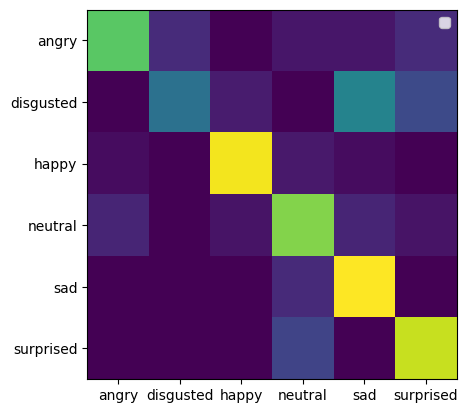

In [102]:
from typing import cast

confidences = model.predict(test_dataset)
predictions = np.argmax(confidences, axis=1)

labels = cast(list[int], list(test_dataset.unbatch().map(lambda x, y: y).as_numpy_iterator()))
target_names = retina.face.FacialExpressionLabels.Ours

cmat = sklearn.metrics.confusion_matrix(labels, predictions, normalize="true")

plt.imshow(cmat)
plt.legend()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)

sklearn.metrics.classification_report(labels, predictions, output_dict=True, target_names=target_names)

In [103]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_40768\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


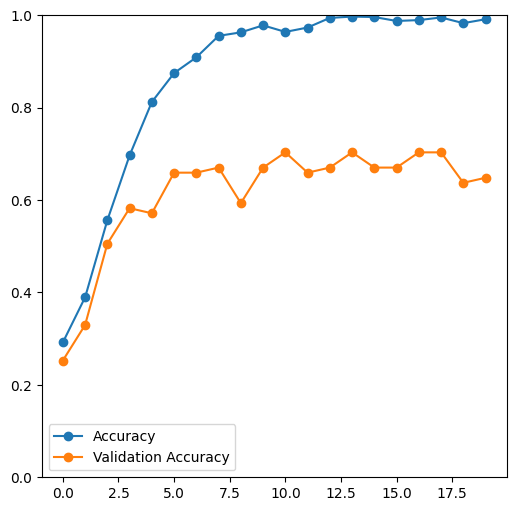

In [104]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()